## <div style="background-color: #BAE3BC; padding: 10px;"><b>Exercicis per practicar amb regressions</b>

</div>

### Exercici 1

* Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from scipy import stats
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### <div style="background-color: #D3DDF7; padding: 10px;"><b>Importem el dataset</b>

</div>

In [2]:
house = pd.read_csv('housing data.csv',header=None)
house.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


*Ara revisem ràpidament el dataset*

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


*Veiem que tenim 14 columnes i 506 files. Totes les columnes són numèriques i porten un tipus de dade Float o int.* 

*Ara necessitem entendre aquest dataset i per això tenim un recurs extra amb els noms de les columnes. A continuació obrirem aquest nou arxiu i mirarem l'informació que té.*

In [4]:
with open('housing data description.txt', encoding='utf8') as h:
    for line in h:
        print(line.strip())

1. Title: Boston Housing Data

2. Sources:
(a) Origin:  This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University.
(b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the
demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.
(c) Date: July 7, 1993

3. Past Usage:
-   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley,
1980.   N.B. Various transformations are used in the table on
pages 244-261.
-  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
In Proceedings on the Tenth International Conference of Machine
Learning, 236-243, University of Massachusetts, Amherst. Morgan
Kaufmann.

4. Relevant Information:

Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

1. CRIM      per capita crime rate by town
2. ZN 

*L'arxiu anterior és fonamental per desenvolupar l'actual exercici. Fent un resumen, el dataset que hem anomenat 'House' és una mostra del valor de l'habitage als suburbis de Boston. Aquest dataset té atributs qué parlen sobre les característiques de l'habitatge i per tant influeixen en el seu preu. El preu esta representat en el dataset per la variable 'MEDV', doncs aquesta seria la nostra variable a predir o target. Totes les altres variables que no siguin el target són atributs de l'habitatge mateix o relatius al barri i, en conseqüència influeixen en el preu final de l'habitatge.*

*Ara que ja tenim el nom de les columnes i sabem que volen dir, canviarem els noms predeterminats de les columnes per les correctes*

In [5]:
house.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
house.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


*Ara repasem el dataset novament.*

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
house.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Veiem com la columne 'CHAS' només té dos valors unics. Això és perquè correspon a una variable dummy (binària). Llavors, es posa un "1" si el terreny on es localitza l'habitatge limita amb el riu i "0" si passa el contrari.

*Mirarem si hi ha Nan's, nulls o duplicats*.

In [9]:
house.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
house.duplicated().sum()

0

*Ara que ja hem comprovat que no existeixen nulls, nan's ni duplicats, doncs mirarem la correlació de totes les variables amb una gràfica de Heatmap.*

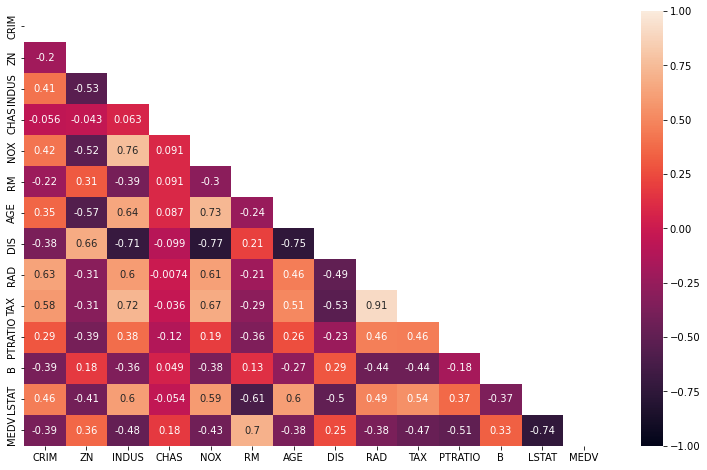

In [12]:
plt.figure(figsize=(13,8))
mask = np.triu(np.ones_like(house.corr()))

sns.heatmap(house.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

plt.show()

1. El heatmap ens indica que la nostra variable target "MEDV" té una alta correlació positiva amb "RM" i negativa amb "LSTAT". Això fa molt sentit perquè per una banda mentre més habitacions tingui un habitatge major serà el preu i, d'un altre banda mentre el porcentatge de població de baixos ingressos sigui més baix, doncs el valor de l'habitatge serà més alt. Això perquè normalment en las zones més riques els habitatges tenen preus més alts. 

2. Una de les correlacions més altes del conjunt de dades es dona entre "DIS" i "NOX". És una alta correlació negativa que s'explica perquè mentre més lluny de les zones d'alta densitat de treball, comportaria menys densitat de trànsit, població flotant, industries, etc. D'aquesta manera quant més lluny d'aquest llocs, el nivell de contaminació serà més baix.

*En general sense entrar en detalls, podem veure correlacions tant positives com negatives amb un grup important de variables que correlacionen al voltant d'un R entre 0.3 i 0.5*.

### <div style="background-color: #D3DDF7; padding: 10px;"><b>Preprocessament</b>

</div>

*Abans d'aplicar algún procés de transformació a les nostres dades hem d'entre perqué ho fem. A continuació algunes idees fonamentals:*

1. Si hem d'aplicar models de machine learning en un pas posterior, hem d'assegura-nos que aquests models puguin comparar i combinar les variables sota una escala comú.

2. Alguns models de machine learning assumeixen que les dades ja es troben estandaritzades.

3. Hem d'asegurar-nos que cap variable pugi tenir una dominància per sobre les altres. Si existeix una variable amb una escala molt més gran que altres podría tenir un impacte desproporcionat en el model.

Dit això i primer de tot, el que farem serà veure si totes les variables tenen una distribució normal. Perquè dependent d'això, farem diferents tipus de transformacions. Per tant, aquest pas és bàsic abans de fer alguna altre cosa. Farem servir un bucle per fer-ho ràpida i numèricament (podriem mirar-ho només visualment però això no ens assegura res). Aplicarem el test de Shapiro:

Comprovarem per a cada variable del dataset el següent:
    
    1. Hipòtesi nul·la      (H0): Aquesta variable té probablement una distribució normal de tipus Gaussiana."
    2. Hipòtesi alternativa (H1): Aquesta variable no té probablement una distribució normal de tipus Gaussiana."

In [13]:
from scipy import stats
from scipy.stats import shapiro

for data in house.columns:
    shapiro_test = stats.shapiro(house[data])
    print("La variable", data, "te un P-value de", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("La mostra té probablement una distribució normal i, per tant s'acull l'hipòtesi nul·la.\n")
    else:
        print("La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.\n")

La variable CRIM te un P-value de 1.3285678005931464e-36
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable ZN te un P-value de 7.882576753156324e-34
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable INDUS te un P-value de 1.0642289039786765e-17
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable CHAS te un P-value de 2.350467979135232e-40
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable NOX te un P-value de 5.775851259944009e-14
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable RM te un P-value de 2.41115960530891e-10
La mostra no té probablement una distribució normal i, per tant es rebutja l'hipòtesi nul·la.

La variable AGE te un P-value de 2.230570069931666e-18
La mostra no té probablement una distribuc

El test de shapiro ens diu que cap variable té una distribució normal. Ara mirarem si tenim o no outliers per tal de triar quin tipus de transformació farem desprès per a cada variable.

Farem servir llavors el Boxplot per detectar outliers.

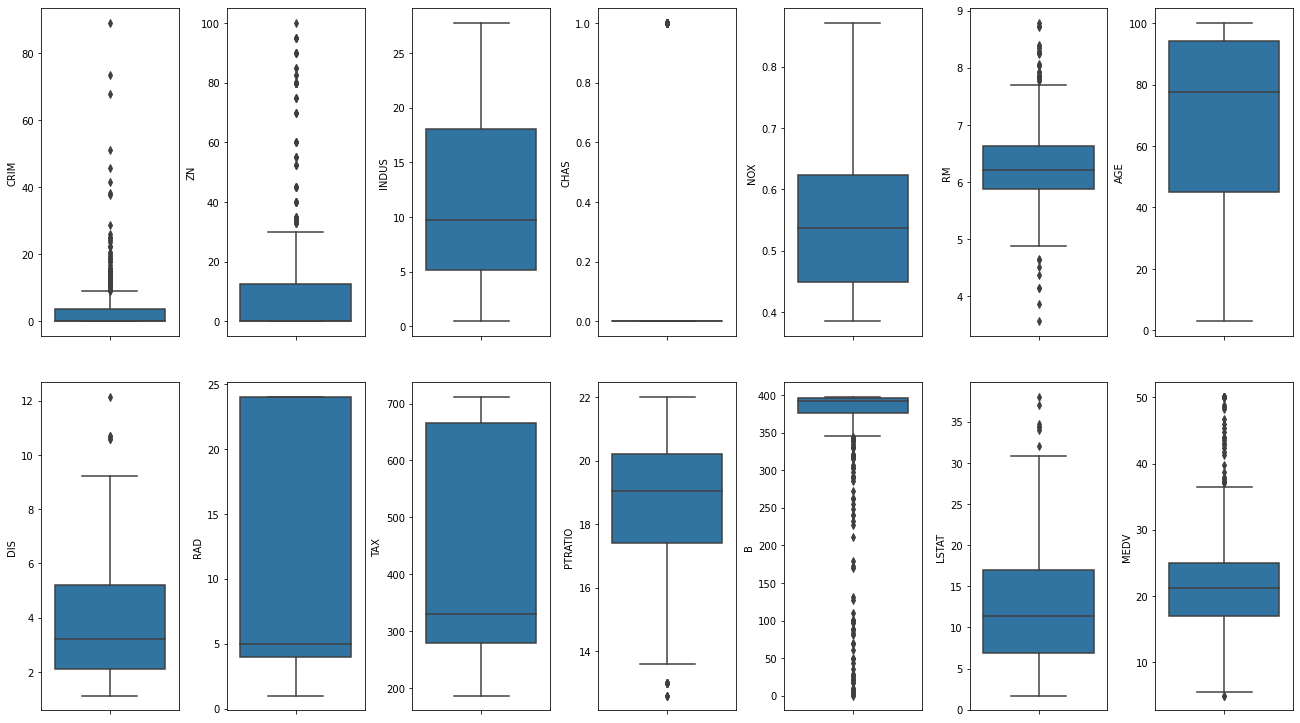

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(18, 10))
count = 0
axs = axs.flatten()
for i,var in house.items():
    sns.boxplot(y=i, data=house, ax=axs[count])
    count= count+1
plt.tight_layout(pad=0.5, w_pad=0.78, h_pad=4.0)

### Resumen de les nostres variables abans de la transformació: 

1. Amb les variables que hem vist que tenen outliers, doncs farem un **RobustScaler**. Aquestes variables són                 les següents; 'RM', 'ZN', 'CRIM','B','LSTAT', 'PTRATIO' i 'DIS'.
           
2. Amb les variables que hem vist sense outliers, doncs farem un **MinMaxScaler**. Aquestes variables són les                 les següents; 'AGE', 'TAX', 'INDUS' i 'NOX

3. 'CHAS' i 'RAD' són variables categóriques i per aixó no intervindrem amb algún procés de transformació. Només farem una amb dummificació de 'RAD' posant-li '0' o '1' a les seves dades.

In [15]:
house = pd.get_dummies(house, columns = ["RAD"])
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0


Fem una copia del dataset original

In [16]:
house_pre = house.copy()

### Apliquem les transformacions

#### RobustScaler

In [17]:
from sklearn import preprocessing

Robust_scaler = preprocessing.RobustScaler().fit(house_pre[['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']])
house_pre[['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']] = Robust_scaler.transform(house_pre[['CRIM', 'ZN', 'RM', 'DIS','PTRATIO', 'B', 'LSTAT']])

#### MinMax Scaler

In [18]:
from sklearn import preprocessing

MinMax_scaler = preprocessing.MinMaxScaler().fit(house_pre[['INDUS', 'NOX', 'AGE', 'TAX']])
house_pre[['INDUS', 'NOX', 'AGE', 'TAX']] = MinMax_scaler.transform(house_pre[['INDUS', 'NOX', 'AGE', 'TAX']])

house_pre.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,...,24.0,1,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,...,21.6,0,1,0,0,0,0,0,0,0
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,...,34.7,0,1,0,0,0,0,0,0,0
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,...,33.4,0,0,1,0,0,0,0,0,0
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,...,36.2,0,0,1,0,0,0,0,0,0
5,-0.063048,0.00,0.063050,0,0.150206,0.300136,0.574665,0.924391,0.066794,-0.125000,...,28.7,0,0,1,0,0,0,0,0,0
6,-0.046792,1.00,0.271628,0,0.286008,-0.266260,0.656025,0.761936,0.236641,-1.375000,...,22.9,0,0,0,0,1,0,0,0,0
7,-0.031143,1.00,0.271628,0,0.286008,-0.049458,0.959835,0.888221,0.236641,-1.375000,...,27.1,0,0,0,0,1,0,0,0,0
8,-0.012592,1.00,0.271628,0,0.286008,-0.782520,1.000000,0.930835,0.236641,-1.375000,...,16.5,0,0,0,0,1,0,0,0,0
9,-0.024053,1.00,0.271628,0,0.286008,-0.277100,0.854789,1.095977,0.236641,-1.375000,...,18.9,0,0,0,0,1,0,0,0,0


#### TRAIN / TEST  (75/25)

Ara separarem les dades del preprocessat en Train (75%) i test (25%). Com ja ho sabem, el nostre target és 'MEDV'

In [19]:
from sklearn.model_selection import train_test_split

X = house_pre.drop(['MEDV'], axis = 1)
y = house_pre[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 21)
(127, 21)
(379, 1)
(127, 1)


### Aplicant els Models

Ara explorarem dos algoritmes d'aprenentatge automatitzat enfocats a tasques de regressió. Primer de tot farem servir la regressió Linial

### Model de Regressió Linial

1. Crearem l'objecte que farem servir per entrenar el model - 'lr'.
2. Entrenarem el model amb les dades de l'entrenament i ajustarem els paràmetres del model - '.fit()'.
3. Farem la predicció amb les dades de prova - '.predict'.
4. Mostrarem prediccions per als primers registres del dataset - '[]'.

In [21]:
from sklearn.linear_model import LinearRegression

#1
lr = LinearRegression()

#2
lr.fit(X_train, y_train)

#3
y_predic_lr = lr.predict(X_test)

#4
y_predic_lr[1:10]

array([[17.23329348],
       [19.10206684],
       [24.94756221],
       [34.37092973],
       [24.70431312],
       [17.94246226],
       [18.84205195],
       [19.53884034],
       [17.26352846]])

### Model SVR (Support Vector Regression)

1. Crearem l'objecte que farem servir per entrenar el model - 'lr'.
2. Entrenarem el model amb les dades de l'entrenament i ajustarem els paràmetres del model - '.fit()'.
3. Farem la predicció amb les dades de prova - '.predict'.
4. Mostrarem prediccions per als primers registres del dataset - '[]'.

In [22]:
from sklearn.svm import SVR

#1
supvr = SVR()

#2
supvr.fit(X_train, y_train)

#3
y_predic_supvr = supvr.predict(X_test)

#4
y_predic_supvr[1:10]

array([21.69144   , 19.97635087, 25.53655044, 30.61249182, 23.6309241 ,
       16.71674871, 19.03139857, 19.16565616, 16.93597664])

**Finalment hem fet la predicció per als dos models proposats, agafant els primers nou registres del dataset.**

Ara per tal de tenir una millor visualització de com es distribueixen les dades dels dos models respecte de les dades del Test, farem una representación gràfica a través de models de densitat.

*Una de les coses que s'ha de tenir en els models d'aprenentatge automatizat es tenir arrays d'una dimensió. per tant ara abans de fer la representació hem triat assegurarnos de convertir l'array test i les seves prediccions amb el "lr" i el "supvr" en un array d'una dimensió*.

In [23]:
y_test = np.array(y_test).ravel()
y_predic_lr = y_predic_lr.ravel() 
y_predic_supvr = y_predic_supvr.ravel()

#### Representación gràfica dels nostres models vs el nostra test.

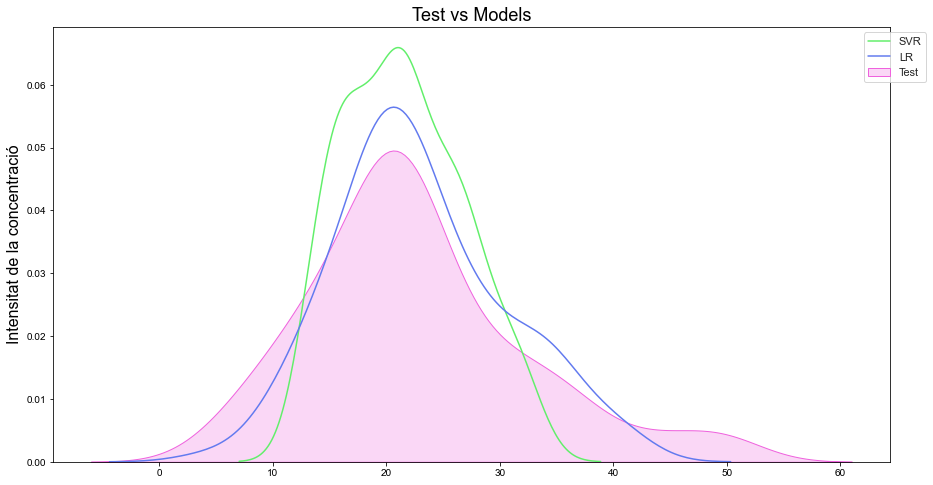

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(style= "whitegrid")

sns.kdeplot(y_predic_supvr, label='SVR', color='#62EF6B', fill=False)
sns.kdeplot(y_predic_lr, label='LR', color='#627AEF', fill=False)
sns.kdeplot(y_test, label='Test', color='#EF62DE', fill=True)
plt.title("Test vs Models", fontsize = 18)
plt.ylabel('Intensitat de la concentració', fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

Veiem que els models tenen una distribució i ajustament diferent en relació al test. Per una banda veiem que el Model de Regressió Lineal (en blau) té un comportament de les seves dades amb un ajustament millor que el SVR. Si només analitzem gràficament els models podriem dir que la regresió lineal hauria de tenir errors més baixos que que el SVR respecte del test. Però com sempre, aixó ho hem de corroborar amb mètriques i per tant evaluarem els dos models amb dues diferents mètriques que ens serviran per mesurar els seus errors.

### Exercici 2

* Compara’ls en base al MSE i al R2.

*Primer de tot farem servir el **MSE (Mean Square Error)**. Amb aquesta mesura evaluarem la qualitat de l'ajustament entre els valors obvservats i els predits. Tècnicament, mesura la mitjana de la magnitud dels errors quadràtics entre la regressió i els punts obvservats. Una cosa molt importan a dir és qué el MSE s'expressa en les mateixes unitats que la variable de resposta.*

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

lr_MSE = mean_squared_error(y_test, y_predic_lr)
supvr_MSE = mean_squared_error(y_test, y_predic_supvr)

Ara calcularem el **R2 (Coeficient de determinació)**. Dit de manera senzilla, el coeficient de determinació R2 és la força de la correlació explicada pel model entre la resposta i la variable independent. Un valor alt de R2 indica que el model s'ajusta bé a les dades. Aquesta mesura s'expressa com un percentatge.

In [26]:
lr_R2 = r2_score(y_test, y_predic_lr)
supvr_R2 = r2_score(y_test, y_predic_supvr)

Ara crearem un nou dataframe per fer una visualització de la comparativa.

In [27]:
mesures=pd.DataFrame(data=[['Linear Regression', lr_MSE, lr_R2],['Support Vector Regression', supvr_MSE, supvr_R2]], columns=['Tipus de Model', 'MSE', 'R2'])
mesures.round(3)

,Tipus de Model,MSE,R2
0,Linear Regression,23.887,0.742
1,Support Vector Regression,37.900,0.591


#### Comentaris

Desprès de calcular aquests dos tipus d'errors pels dos tipus de models proposats, estem en condicions de dir que el anàlisi gràfic preliminar tenia sentit. Ara tenim dades per dir qué (almenys) per aquests dos tipus d'errors, el model de Regressió Linial ajusta le seve equació millor que el SVR pel conjunt de dades del test. El R2 és major en la regressió per tant podem dir que en aquest cas tindrem una força de correlació més potent i podríem operar amb un millor nivell de confiança (74% vs 59%). Per un altre banda el MSE ens indica qué per a la regressió també podríem treballar amb un nivell de qualitat major (23 vs 37) pel major nivell d'ajustament entre els valors observats i predits.

Finalment si mirem l'análisi amb una perspectiva més àmplia podríem dir que tant el R2 com el MSE són perfectamentep perfectibles. Si bé tenim valors qué podríem dir qué són bons, ja veiem que tenim marge per millorar-lo. Potser amb una base dades més robusta amb un set d'entrenament més potent que els 379 registres de train i 127 de test, milloraria una mica més els valors d'error. Però en aquest cas farem un altre cosa qué serà intentar millorar la qualitat de la regressió però modificant els paràmetres que per defecte hem utilitzat amb els models.

### Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

*Primer de tot hem de conèixer quins són els paràmetres que hem fet servir per defecte en el models proposats*

In [28]:
print("Paràmetres per defecte en el model de Regressió: \n", lr.get_params())

Paràmetres per defecte en el model de Regressió: 
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


Ara que ja coneixem els paràmetres utilitzats per defecte farem servir la funció **GridsearchCV** per trobar de manera automàtica la comabinació òptima. Amb això ajudarem a evitar el sobreajustament del model. Primer de tot, crearem un diccionari que ens servirà com a xarxa de valors per a cada paràmetre que és vulgui ajustar.

Com hem vist el paràmetre 'normalize' es troba en desús i probablement serà eliminada de la biblioteca en versions posteriors. Però, hem vist qué de totes maneres podriem fer servir l'opció 'True' en el cas de no haver aplicat técniques de preprocessament (com MinMaxscaler) per normalizar les dades. Com ja ho hem fet doncs no té sentit replicar-ho fins i tot en un paràmetre en desús.

In [29]:
from sklearn.model_selection import GridSearchCV

xarxa_lr = {'copy_X':(True, False),
           'fit_intercept':(True, False),
           'n_jobs':(-1, None, 1),
           'positive':(True, False)}

* #1 Ara crearem l'objecte on farem servir la funció Gridsearch i aplicarem la xarxa creada pel model de regressió. 
* #2 Desprès crearem un altre objecte on trobarem els millors paràmetres en les nostres dades d'entrenament.
* #3 Finalment ho imprimirem per saber quins seràn els millors nous hiperparàmetres del model de regressió.

In [30]:
#1
grid_lr = GridSearchCV(lr, xarxa_lr)

#2
best_par_lr = grid_lr.fit(X_train, y_train)

#3
print("Millors paràmetres model de regressión 'LR':", best_par_lr.best_params_)

Millors paràmetres model de regressión 'LR': {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': False}


#### Millorant el model de regressió

Ara que ja tenim el nostres nous millors paràmetres, haurem d'aplicarl-los en el nostra model de regressió novament. Podem veure qué 'fit_intercept' i 'n_jobs' han canviat. Per tant, aquestes seràn les modificacions que farem. Aplicarem novament els dos tipus d'errors per mirar si ha millorat o no.

In [35]:
lr_millor = LinearRegression(fit_intercept=False, n_jobs=-1)
lr_millor.fit(X_train, y_train)
y_predic_lr_millor = lr_millor.predict(X_test)

lr_MSE_millor = mean_squared_error(y_test, y_predic_lr_millor)
lr_R2_millor = r2_score(y_test, y_predic_lr_millor)

print("lr_MSE_millor:", lr_MSE_millor, "\nlr_R2_millor:", lr_R2_millor)

lr_MSE_millor: 23.887420137225206 
lr_R2_millor: 0.7419306624197965


#### Modificant els paràmetres del model SVR

Ara farem pràcticament els mateixos passos fets amb la regressió, però ara per millorar l'ajustament del model SVR. L'única gran diferència seran els paràmetres a modificar, perqué és un model diferent. Dit això no farem una descripció en detall del passos com en el primer model.

In [32]:
print("Paràmetres per defecte en el model SVR: \n", supvr.get_params())

Paràmetres per defecte en el model SVR: 
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Fent una ràpida recerca si acotem a 5 paràmetres podriem quedar-nos amb els que veurem a continuació:

In [34]:
from sklearn.model_selection import GridSearchCV

xarxa_supvr = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
               'C':[1,5,10],
               'degree':[3,6,8],
               'coef0':[0.0,0.5,1],
               'gamma':('scale','auto')}

#1
grid_supvr = GridSearchCV(supvr, xarxa_supvr)

#2
best_par_supvr = grid_supvr.fit(X_train, y_train)

#3
print("Millors paràmetres model SVR:", best_par_supvr.best_params_)

Millors paràmetres model SVR són: {'C': 10, 'coef0': 0.0, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}


#### Millorant el model SVR

In [36]:
supvr_millor = SVR(C=10, gamma='auto')
supvr_millor.fit(X_train, y_train)
y_predic_supvr_millor = supvr_millor.predict(X_test)

supvr_MSE_millor = mean_squared_error(y_test, y_predic_supvr_millor)
supvr_R2_millor = r2_score(y_test, y_predic_supvr_millor)

print("supvr_MSE_millor:", supvr_MSE_millor, "\nsupvr_R2_millor:", supvr_R2_millor)

supvr_MSE_millor: 17.410456536236428 
supvr_R2_millor: 0.8119049709234367


### Resumint l'informació

Ara que ja tenim novas versions dels models producte de les millores que hem fet canviant alguns paràmetres, agafarem el nostre dataframe "mesures" i el complementarem amb la nova informació. Així mateix tindrem una vista ràpida i pràctica de quin és el model que ha donat millors resultats.

In [80]:
mesures_millor = pd.DataFrame(data = [['Linear Regression millor', lr_MSE_millor, lr_R2_millor], ['Support Vector Regression millor', supvr_MSE_millor, supvr_R2_millor]], columns = ['Tipus de Model', 'MSE', 'R2'])
mesures = mesures.append(mesures_millor, ignore_index=True)

In [83]:
mesures

,Tipus de Model,MSE,R2,R2 Cross Val
0,Linear Regression,23.887420,0.741931,0.325008
1,Support Vector Regression,37.899717,0.590548,0.223777
2,Lineal Regression millor,23.887420,0.741931,0.325008
3,Support Vector Regression millor,17.410457,0.811905,0.486263


### Comentaris 

A través del canvi de paràmetres hem vist com un model que semblava pitjor que l'altre pot acabar sent millor. El principi la regressió linial ens donava un MSE més baix i un R2 més alt que el model SVR. Però, hem vist com la modificación de només un parell de paràmetres en el model SVR ha fet un canvi substancial baixant el MSE en més d'un 50% i millorant el R2 més de dues décimes (o més de 20% d'explicació de variança).

Només amb dos paràmetres el model ha millorat força, per tant per a més andavant penso que hauríem de fer una millor recerca dels paràmetres encara, perquè aquests resultats ens parlen de qué un model es pot millorar encara més.

### Exercici 4

Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

El que farem ara serà una validació creuada del model per tal d'evaluar el seu rendiment de manera més robusta. Farem que el modelo iteri a través de 5 particions i qué el scoring sigui el coeficient de determinació R2. A més a més hem investigat qué aquesta validació serveix molt per ajustar els paràmetres del model, perquè en cada iteració del model és pot ajustar els diferents paràmetres i així triar la millor combinació.

Com que ja hem fet la millora de paràmetres ara no cal torna a fer-les, sobretot perquè no tenim temps. No obstant això, ho considerarem per a més endavant.

Tornarem a agafar el nostre dataframe resumen "mesures" i el complementarem amb el resultat del R2 però amb la validación creuada.

Finalment tornarem a fer els gràfics dels exercicis anteriors però ara afegint els resultats dels úlrims models.

In [41]:
from sklearn.model_selection import cross_val_score

cross_lr = cross_val_score(lr, X, y, cv=5, scoring='r2')
cross_supvr = cross_val_score(supvr, X, y, cv=5, scoring='r2')
cross_lr_millor = cross_val_score(lr_millor, X, y, cv=5, scoring='r2')
cross_supvr_millor = cross_val_score(supvr_millor, X, y, cv=5, scoring='r2')

In [48]:
print("Cross_lr:", cross_lr, "\nCross_supvr:", cross_supvr, "\nCross_lr_millor:", cross_lr_millor, "\nCross_supvr_millor:", cross_supvr_millor)


Cross_lr: [ 0.61238312  0.74278118  0.5536421   0.08098992 -0.36475742] 
Cross_supvr: [ 0.66258474  0.54237834  0.08301845  0.27511001 -0.4442057 ] 
Cross_lr_millor: [ 0.61238312  0.74278118  0.5536421   0.08098992 -0.36475742] 
Cross_supvr_millor: [ 0.84215674  0.8073143   0.76645859  0.41766697 -0.4022804 ]


In [49]:
mesures['R2 Cross Val'] = [cross_lr.mean(), cross_supvr.mean(), cross_lr_millor.mean(), cross_supvr_millor.mean()]
mesures

,Tipus de Model,MSE,R2,R2 Cross Val
0,Linear Regression,23.887420,0.741931,0.325008
1,Support Vector Regression,37.899717,0.590548,0.223777
2,Lineal Regression millor,23.887420,0.741931,0.325008
3,Support Vector Regression millor,17.410457,0.811905,0.486263


Veiem que desprès de fer la validació creuada tots el R2 de tots els models es troben més baixos. Com havíem dit abans la validació creuada és un mètode més rigorós. Això vol dir qué normalment el R2 serà més baix que en el càlcul d'aquesta mètrica per tot un conjunt sencer d'entrenament per una banda i de prova d'altre.

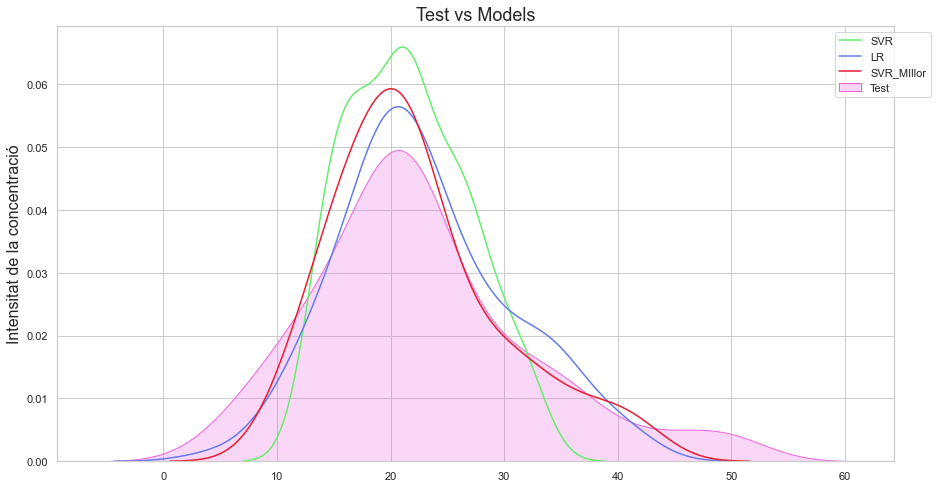

In [52]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(style= "whitegrid")

sns.kdeplot(y_predic_supvr, label='SVR', color='#62EF6B', fill=False)
sns.kdeplot(y_predic_lr, label='LR', color='#627AEF', fill=False)
sns.kdeplot(y_predic_supvr_millor, label='SVR_MIllor', color='#EA1A2D', fill=False)
sns.kdeplot(y_test, label='Test', color='#EF62DE', fill=True)

plt.title("Test vs Models", fontsize = 18)
plt.ylabel('Intensitat de la concentració', fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

Tots els models veiem que prediuen una alçada de la curva molt més alta qué el test. Però, si ens fixem en la línia vermella podem veure qué el R2 que ja hem vist es reflexa a la gràfica principalment perquè és la curva que millor s'justa a les sinuositats del test.

### Exercici 5

No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

El que farem ara serà tornar a evaluar un model de regressió i un model SVR pas a pas però sense la variable 'RM'. Per tant passarem ràpidament per tots els passos sense gaire explicació perqué ja l'hem fet.

#### 1. Treiem la variable RM del nostra train

In [53]:
X_senRM = X.drop(['RM'], axis = 1)

#### 2. Dividim en train i test (75% / 25%)

In [55]:
X_senRMtrain, X_senRMtest, y_senRMtrain, y_senRMtest = train_test_split(X_senRM, y, test_size=0.25)

#### 3. Produïm el model de Regressió

In [62]:
lr_senRM = LinearRegression()
lr_senRM.fit(X_senRMtrain, y_senRMtrain)
y_predic_lr_senRM = lr_senRM.predict(X_senRMtest)
y_predic_lr_senRM[1:10]

array([[22.09633041],
       [18.50734695],
       [32.90571568],
       [15.05506848],
       [28.00467424],
       [25.92006173],
       [24.10988595],
       [28.27277149],
       [29.81942923]])

#### 4. Produïm el model SVR

In [59]:
supvr_senRM = SVR()
supvr_senRM.fit(X_senRMtrain, y_senRMtrain)
y_predic_supvr_senRM = supvr_senRM.predict(X_senRMtest)
y_predic_supvr_senRM[1:10]

array([20.37120372, 23.98184921, 26.46700074, 14.33207104, 23.13666998,
       23.8834037 , 19.0923177 , 22.45756652, 27.92172511])

#### 5. Produïm el model de regressió millorat

In [63]:
lr_millor_senRM = LinearRegression(fit_intercept=False, n_jobs=-1)
lr_millor_senRM.fit(X_senRMtrain, y_senRMtrain)
y_predic_lr_millor_senRM = lr_millor_senRM.predict(X_senRMtest)
y_predic_lr_millor_senRM[1:10]

array([[22.09633041],
       [18.50734695],
       [32.90571568],
       [15.05506848],
       [28.00467424],
       [25.92006173],
       [24.10988595],
       [28.27277149],
       [29.81942923]])

#### 6. Produïm el model SVR millorat

In [64]:
supvr_millor_senRM = SVR(C=10, gamma='auto')
supvr_millor_senRM.fit(X_senRMtrain, y_senRMtrain)
y_predic_supvr_millor_senRM = supvr_millor_senRM.predict(X_senRMtest)
y_predic_supvr_millor_senRM[1:10]

array([21.34417807, 20.38576538, 28.20178949, 14.43804317, 26.60347615,
       23.32009397, 18.28135257, 25.35697746, 29.35255425])

#### 7. Calculem el MSE - R2 - Validació Creuada pel 'lr_senRM'

In [66]:
lr_MSE_senRM = mean_squared_error(y_senRMtest, y_predic_lr_senRM)
lr_R2_senRM = r2_score(y_senRMtest, y_predic_lr_senRM)
cross_lr_senRM = cross_val_score(lr_senRM, X_senRM, y, cv=5, scoring='r2')

#### 7.1. Calculem el MSE - R2 - Validació Creuada pel 'lr_millor_senRM'

In [67]:
lr_MSE_millor_senRM = mean_squared_error(y_senRMtest, y_predic_lr_millor_senRM)
lr_R2_millor_senRM = r2_score(y_senRMtest, y_predic_lr_millor_senRM)
cross_lr_millor_senRM = cross_val_score(lr_millor_senRM, X_senRM, y, cv=5, scoring='r2')

#### 8. Calculem el MSE - R2 - Validació Creuada pel 'supvr_senRM'

In [89]:
supvr_MSE_senRM = mean_squared_error(y_senRMtest, y_predic_supvr_senRM)
supvr_R2_senRM = r2_score(y_senRMtest, y_predic_supvr_senRM)
cross_supvr_senRM = cross_val_score(supvr_senRM, X_senRM, y, cv=5, scoring='r2')

#### 8.1. Calculem el MSE - R2 - Validació Creuada pel 'supvr_millor_senRM'

In [90]:
supvr_MSE_millor_senRM = mean_squared_error(y_senRMtest, y_predic_supvr_millor_senRM)
supvr_R2_millor_senRM = r2_score(y_senRMtest, y_predic_supvr_millor_senRM)
cross_supvr_millor_senRM = cross_val_score(supvr_millor_senRM, X_senRM, y, cv=5, scoring='r2')

#### 9. Ara acabarem de completar el dataframe general amb la comparació de totes les metriques calculades fins ara.

In [95]:
mesures_senRM = pd.DataFrame(data = [['Lineal Regression senRM', lr_MSE_senRM, lr_R2_senRM, cross_lr_senRM.mean()], ['Lineal Regression Millor senRM', lr_MSE_millor_senRM, lr_R2_millor_senRM, cross_lr_millor_senRM.mean()], ['Support Vector Regression senRM', supvr_MSE_senRM, supvr_R2_senRM, cross_supvr_senRM.mean()], ['Support Vector Regression millor senRM', supvr_MSE_millor_senRM, supvr_R2_millor_senRM, cross_supvr_millor_senRM.mean()]], columns = ['Tipus de Model', 'MSE', 'R2', 'R2 Cross Val'])
mesures = mesures.append(mesures_senRM, ignore_index=True)
mesures

,Tipus de Model,MSE,R2,R2 Cross Val
0,Linear Regression,23.887420,0.741931,0.325008
1,Support Vector Regression,37.899717,0.590548,0.223777
2,Lineal Regression millor,23.887420,0.741931,0.325008
3,Support Vector Regression millor,17.410457,0.811905,0.486263
4,Lineal Regression senRM,28.106436,0.686629,0.476486
5,Lineal Regression Millor senRM,28.106436,0.686629,0.476486
6,Support Vector Regression senRM,58.974620,0.342467,0.073823
7,Support Vector Regression millor senRM,35.088936,0.608779,0.247028


### Comentaris

Si ens recordem de la correlació entre 'RM' i la nostra variable target 'MEDV', sabíem qué aconseguia un 70% de correlació. Per tant, el que podíem esperar era qué en un nou model sense aquesta variable tan important la correlació general baixés. És el que podem veure en el en el dataframe 'mesures'. Pasem d'un 81% en del 'Support Vector Regression millor' fins a un 60% 'Support Vector Regression millor senRM'.

Això ens deixa l'ensenyament què qualsevol variable pot ser determinant en un model multivariat. Per tant s'han de revisar tots els atributs a consciència. També es pot dir que amb una variable tan important com 'RM' amb tanta rellevància en el comput general, es podria treballar molt de manera de pujar el coeficient de correlació.